<a href="https://colab.research.google.com/github/ratral/hyd4gpv_py/blob/main/Vertical_Equal_Tangent_Parabolic_Curve_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Flow with flow restriction and without fittings

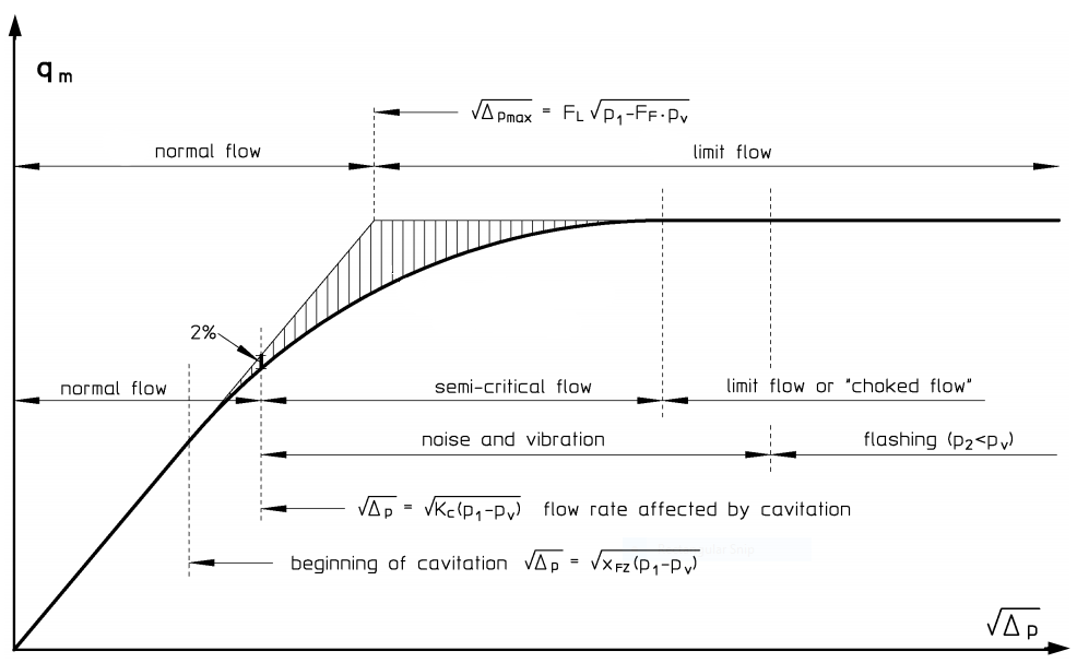

## Elements of Vertical Curve

- $P_1=$ Upstream pressure, constant in bar

- $X_{FZ}=$ The factor for the point of starting the curvature, also known as beginning of cavitation (vertical curve).

- $K_{c}=$ The factor defines the point where noise and vibration or semi-critical flow begins. The flow at this point is $2\%$ less than expected without cavitation. 

- $F_L=$ The factor defines the point of intersection of the tangents, also called begin of the limit flow or o the liquid pressure recovery factor (point of vertical intersection)

- $\sqrt{\Delta{P_{ch}}}=$ Point of tangency, also known as limit flow or "choked flow" (end of vertical curve)

- $𝐿=$ length of parabolic curve, it is the projection of the curve onto a horizontal surface which corresponds to beginning of cavitation ($K_{FZ}$) until the limit flow or "choked flow" ($K_{ch}$).

- $𝑔_1=$ grade (in percent) of back tangent $K_v$.

- $𝑎=$ vertical distance between $q_{FZ}$ and $q_{max.}$

- $𝐻=$ vertical distance between $q_{max.}$ and the curve $q_n = f(\Delta P_n)$

---------------------
## Calculations Steps

1. $Temp. = Constant \; (15°C)$

2. $P_1 = constant$; $P_v= constant$ 

3. Usually, the value $F_L$ provided by the manufacturer refers to the value when the control valve is fully open.

4. $F_F = 0.96 - 0.28 \cdot \sqrt{\frac{P_v}{221.2}}$

5. $ \sqrt{\Delta{P_{max.}}} = \sqrt{\Delta{P_{F_L}}}= F_L \cdot \sqrt{ {P_1-F_F \cdot P_v}}$

6. $q_{max.} = K_v \cdot \sqrt{\frac{\Delta{P_{max.}}}{\rho_1 / \rho_0}}$

7. $ g_1 = \frac{q_{max.}}{\sqrt{\Delta{P_{max.}}}} = \frac{K_v \cdot \sqrt{\Delta{P_{max.}}}}{\sqrt{\Delta{P_{max.}}}} = K_v$

8. $X_{FZ} = \frac{0.9}{\left( 1+3.2\cdot f_d \cdot \sqrt{\frac{K_v}{F_L}} \right)^{0.5}}$

9. $q_{X_{FZ}} = K_v*\sqrt{\Delta{P_{X_{FZ}}}} \;$

10. $K_c = 0.8 \cdot F_L^2$

11. $L = 2 \cdot \left(\sqrt{\Delta{P_{F_L}}} - \sqrt{\Delta{P_{X_{FZ}}}}\right)$ 

12. $ \sqrt{\Delta{P_{ch}}} = \sqrt{\Delta{P_{F_L}}} + L \; \;$

13. $q_n = \frac{K_v}{\sqrt{{\rho_1 / \rho_0}}} \cdot \left( \sqrt{\Delta{P_{X_{FZ}}}} +\sqrt{\Delta{P_{n}}} - \frac{\Delta P_n}{4 ⋅\left(\sqrt{\Delta{P_{F_L}}} - \sqrt{\Delta{P_{X_{FZ}}}}\, \right)} \right)$ 

------

$ y = a \cdot x² + b \cdot x + c  $

Where:

$a \cdot x^2 = -\frac{K_v}{2\cdot L} \cdot \frac{\Delta P_n}{\sqrt{{\rho_1 / \rho_0}}} $

$b \cdot x = K_v \cdot \sqrt{\frac{\Delta{P_n}}{\rho_1 / \rho_0}} $

$c=K_v \cdot \sqrt{\frac{\Delta{P_{X_{FZ}}}}{\rho_1 / \rho_0}}$

Then:

$
q_n = -\frac{K_v}{2\cdot L} \cdot \frac{\Delta P_n}{\sqrt{{\rho_1 / \rho_0}}} + K_v \cdot \sqrt{\frac{\Delta{P_n}}{\rho_1 / \rho_0}} + K_v \cdot \sqrt{\frac{\Delta{P_{X_{FZ}}}}{\rho_1 / \rho_0}}
$

$
q_n = \frac{K_v}{\sqrt{{\rho_1 / \rho_0}}} \cdot \left( \sqrt{{\Delta{P_{X_{FZ}}}}} + \sqrt{\Delta P_n} -\frac{\Delta P_n}{4 ⋅\left(\sqrt{\Delta{P_{F_L}}} - \sqrt{\Delta{P_{X_{FZ}}}}\, \right)}  \right)
$

-----


In [ ]:
#@title Definition of the required functions in Python.

def density(temp_c = 15.5) -> float:
    """Calculate the density of water in [kg/m³]
    Args:
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: density of water in [kg/m³]
    """
    return  0.14395/(0.0112**(1+(1-(temp_c+273.15)/649.727)**0.05107))

def ratio_density(temp_c = 15.5) -> float:
  """
  ratio of specific mass of fluid in upstream condition 
  to specific mass of water at 15.5 °C
  """
  return density(temp_c)/1000

def vapor_pressure(temp_c=15.5) -> float:
    """Calculate the Vapor pressure of water [bar]
    Args:
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: Vapor pressure of water in bar
    """
    return (0.61121*np.exp((18.678-temp_c/234.5)*(temp_c/(257.14+temp_c))))/100

def liquid_critical_pressure(temp_c = 15.5):
    """Calculate the Liquid critical pressure ratio factor ff
    Args:
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: Liquid critical pressure ratio factor
    """
    return (0.96-0.28*np.sqrt(vapor_pressure(temp_c)/221.2))

def flow_coefficent(p_up, p_down, flow, temp_c=15.5) -> float:
    """Calculate the Flow Coefficent Kv in m³/h
    Args:
        p_up (float): Upstreampressure in bar
        p_down (float): Downstreampressure in bar
        flow (float): Flow in m³/h
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: Flow Coefficent of the valve Kv in m³/h
    """
    return flow*np.sqrt((density(temp_c)/1000)/(p_up - p_down))

def kv_fun_zeta(diameter, zeta_value) -> float:
    """Return Flow Coefficient Kv in m³/h knowing the Zeta value.
    Args:
        diameter (float): Diameter in meter
        zeta_value (float): Zeta value of the valve at the n position
    Returns:
        float: Flow Coefficent of the valve Kv in m³/h
    """
    return ((diameter*1000)**2)/np.sqrt(626.3*zeta_value)


def delta_pressure(p1, coefficient, temp_c=15.5):
    """ Maximum Pressure 
    Args:
        p1 (float): Upstreampressure in bar
        coefficient (float): The pressure coefficient of the valve position
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.

    Returns:
        float: Pressure difference where normal flow ends through the control valve.
    """
    return (coefficient)*(p1-vapor_pressure(temp_c))


def delta_pressure_max(p1, fl, temp_c=15.5):
    """ Maximum Pressure 
    Args:
        p1 (float): Upstreampressure in bar
        fl (float): The pressure recovery coefficient of the valve position
        temp_c (int, optional): The temperature in Celsius. Defaults to 15°C.

    Returns:
        float: Pressure difference where normal flow ends through the control valve.
    """
    return (fl**2)*(p1-liquid_critical_pressure(temp_c)*vapor_pressure(temp_c))

def flow_rate(kv, d_pressure, temp_c = 15.5):
    """  Limit flow or Choked flow
    Args:
        kv (float): Flow Coefficent of the valve Kv in m³/h
        d_pressure(float): bar
        temp_c (int, optional):  The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: Limit flow in m³/h
    """
    return kv * np.sqrt(d_pressure/ratio_density(temp_c))

def Coeff_incipient_cavitation(kv, fl, fd) -> float:
    """ Calculation of the Coefficient of incipient cavitation Xfz
    Args:
        kv (float): Flow Coefficent of the valve Kv in m³/h
        fl (float): pressure recovery coefficient of the valve position
        fd (float): Valve style modifier
    Returns:
        float: Coefficient of incipient cavitation Xfz
    """
    return 0.9/np.sqrt(1+3.172037831*fd*np.sqrt(kv/fl))

def coeff_constant_cavitation(fl)-> float:
    """Calculation of the Coefficient of constant cavitation kc
    Args:
        fl (float): pressure recovery coefficient of the valve position
    Returns:
        float: Coefficient of constant cavitation Xfz
    """
    return 0.80*fl**2

def sigma_value(p1, d_pressure, temp_c = 15.5)->float:
    """_summary_
    Args:
        p1 (float): Upstreampressure in bar
        d_pressure(float): bar
        temp_c (int, optional):  The temperature in Celsius. Defaults to 15°C.
    Returns:
        float: sigma value
    """
    return (p1 - vapor_pressure(temp_c))/d_pressure

def sigma_range( xfz, kc, fl)-> float:
  return  (1/(fl**2), 1/kc, 1/xfz)

def sigma_regime(sigma, xfz, kc, fl):
  s_range =list(sigma_range( xfz, kc, fl))
  s_regime = ['REGIME I', 'REGIME II', 'REGIME III', 'REGIME IV']
  if sigma <= s_range[0]:return s_regime[3]
  if sigma > s_range[0] and sigma <= s_range[1]:return s_regime[2]
  if sigma > s_range[1] and sigma <= s_range[2]:return s_regime[1]
  if sigma > s_range[2]:                        return s_regime[0]

v_sigma_regime = np.vectorize(sigma_regime)

def vertical_curve(sqrt_dp, kv, sqrt_dp_xfz, sqrt_dp_fl, temp_c = 15.5):
    """Calculate the transition of the flow during to Choked flow.
    Args:
        dp (float): The square root of the differential pressure to be calculated in bar
        kv (float): Flow Coefficent of the valve Kv in m³/h
        sqrt_dp_xfz (float): The square root of the differential pressure at the start of the incipient cavitation in bars.
        sqrt_dp_fl(float): The square root of the differential pressure at the start of the limit flow in bars.
    Returns:
        float: flow in m³/h
    """
    return kv/np.sqrt(ratio_density(temp_c))*(sqrt_dp_xfz+sqrt_dp-(sqrt_dp**2)/(4*(sqrt_dp_fl- sqrt_dp_xfz)))
    
def flow_rate_curve(kv, fl, fd, p1, w_tempeterure = 15.5):

  # 1. Calculation of INCIPIENT cavitation point
  xfz = Coeff_incipient_cavitation(kv, fl, fd)
  dp_xfz = delta_pressure(p1, xfz, w_tempeterure)
  sqrt_dp_xfz = np.sqrt(dp_xfz)
  flow_xfz = flow_rate(kv, dp_xfz, w_tempeterure)

  # 2. Calculation MAXIMUM point of cavitation
  dp_fl = delta_pressure_max(p1, fl)
  sqrt_dp_fl = np.sqrt(dp_fl)
  flow_fl = vertical_curve(sqrt_dp_fl-sqrt_dp_xfz, kv, sqrt_dp_xfz, sqrt_dp_fl, w_tempeterure)

  # 3. Calculation of CONSTANT cavitation point
  kc = coeff_constant_cavitation(fl)
  dp_kc = delta_pressure(p1, kc, w_tempeterure)
  sqrt_dp_kc = np.sqrt(dp_kc)
  flow_kc = vertical_curve(sqrt_dp_kc-sqrt_dp_xfz, kv, sqrt_dp_xfz, sqrt_dp_fl, w_tempeterure)
  linear_flow_rate = flow_rate(kv, dp_kc, w_tempeterure)

  # 4. Calculation of SHOCK cavitation point
  sqrt_dp_ch = sqrt_dp_fl + (sqrt_dp_fl-sqrt_dp_xfz)
  flow_ch = flow_rate(kv, dp_fl, w_tempeterure)

  # 5. length of parabolic curve
  curve_length = (sqrt_dp_fl-sqrt_dp_xfz)*2

  # 6. Segment 1
  segment_1 = np.linspace(start = 0, stop = sqrt_dp_xfz, num = 200)
  df_vc_1   = pd.DataFrame(segment_1, columns = ['sqrt_dp'])
  df_vc_1   = df_vc_1.assign(q = flow_rate(kv, df_vc_1.sqrt_dp**2, w_tempeterure))

  # 7. Segment 2
  segment_2 = np.linspace(start = 0, stop = curve_length, num = 200) 
  df_vc_2 = pd.DataFrame(segment_2, columns = ['sqrt_dp'])
  df_vc_2 = df_vc_2.assign(q = vertical_curve(df_vc_2.sqrt_dp, kv, sqrt_dp_xfz, sqrt_dp_fl))
  df_vc_2.sqrt_dp = df_vc_2.sqrt_dp + sqrt_dp_xfz

  # 8. Segmant 3
  segment_3 = np.linspace(start = sqrt_dp_ch, stop = sqrt_dp_ch+curve_length*.2, num = 2) 
  df_vc_3   = pd.DataFrame(segment_3, columns = ['sqrt_dp'])
  df_vc_3   = df_vc_3.assign(q = flow_ch)


  # 8.Concat segmants
  df_vc_0 = pd.concat([df_vc_1, df_vc_2, df_vc_3])

  # 9. Calculation of sigma value
  df_vc_0 = df_vc_0.assign(sigma = sigma_value(p1, df_vc_0.sqrt_dp**2, w_tempeterure))
  df_vc_0 = df_vc_0.assign(regime = v_sigma_regime(df_vc_0.sigma, xfz, kc, fl))

  return df_vc_0



In [ ]:
#@title Input Data.

valve = "Plunger Valve"
cyl_name = "One-piece body Mobile Flat Cylinder"
w_tempeterure = 15 # Centigrade
dn   = 200 

zv   =  1.9
fl   =  0.6
fd   =  0.1 # Values betwen 10% to 100%


zv_b  =  1.9
fl_b  =  0.6
fd_b  =  0.2 # Values betwen 10% to 100%


# Upstream Pressure in bar
p1 = 5


In [ ]:
#@title Calculation the points of cavitation.

# 1. Calculation of the Flow Coefficent Kv in m3/h
kv = kv_fun_zeta(dn/1000, zv)

# 2. Calculation of INCIPIENT cavitation point
xfz = Coeff_incipient_cavitation(kv, fl, fd)
dp_xfz = delta_pressure(p1, xfz, w_tempeterure)
sqrt_dp_xfz = np.sqrt(dp_xfz)
flow_xfz = flow_rate(kv, dp_xfz, w_tempeterure)

# 3. Calculation MAXIMUM point of cavitation
dp_fl = delta_pressure_max(p1, fl)
sqrt_dp_fl = np.sqrt(dp_fl)
flow_fl = vertical_curve(sqrt_dp_fl-sqrt_dp_xfz, kv, sqrt_dp_xfz, sqrt_dp_fl, w_tempeterure)

# 4. Calculation of CONSTANT cavitation point
kc = coeff_constant_cavitation(fl)
dp_kc = delta_pressure(p1, kc, w_tempeterure)
sqrt_dp_kc = np.sqrt(dp_kc)
flow_kc = vertical_curve(sqrt_dp_kc-sqrt_dp_xfz, kv, sqrt_dp_xfz, sqrt_dp_fl, w_tempeterure)
linear_flow_rate = flow_rate(kv, dp_kc, w_tempeterure)

# 5. Calculation of SHOCK cavitation point
sqrt_dp_ch = sqrt_dp_fl + (sqrt_dp_fl-sqrt_dp_xfz)
flow_ch = flow_rate(kv, dp_fl, w_tempeterure)

# 6. length of parabolic curve
curve_length = (sqrt_dp_fl-sqrt_dp_xfz)*2



In [ ]:
#@title Print Values.

print(f'Vapor Pressure: {vapor_pressure():.4} bar')
print(f'Flow Coefficent Kv: {kv:,.6} m³/h')

print('\n')

print(f'Incipient cavitation Coefficient: {xfz:,.4}')
print(f'DP incipient cavitation: {dp_xfz:,.4} bar')
print(f'Flow incipient cavitation: {flow_xfz:,.6} m³/h')

print('\n')
print(f'Constant cavitation Coefficient: {kc:,.4}')
print(f'DP Constant Cavitation: {dp_kc:,.4} bar')
print(f'Flow Constant Cavitation: {flow_kc:,.6} m³/h')

print('\n')
print(f'Linear Flow for Constant Cav.: {linear_flow_rate:,.6} m³/h')
print(f'Delta Flow : {1-flow_kc/linear_flow_rate:.2%} ')

print('\n')
print(f'DP Maximum vibration: {delta_pressure_max(p1, fl):,.4} bar')
print(f'Flow Maximum vibration: {flow_fl:,.6} m³/h')

print('\n')

print(f'DP Chock cavitation: {sqrt_dp_ch**2:,.4} bar')
print(f'Shock Flow.: {flow_ch:,.6} m³/h')

print(sigma_range( xfz, kc, fl))

print(sigma_regime(3.5, xfz, kc, fl))

Vapor Pressure: 0.01761 bar
Flow Coefficent Kv: 1,159.56 m³/h


Incipient cavitation Coefficient: 0.2227
DP incipient cavitation: 1.109 bar
Flow incipient cavitation: 1,218.21 m³/h


Constant cavitation Coefficient: 0.288
DP Constant Cavitation: 1.435 bar
Flow Constant Cavitation: 1,364.35 m³/h


Linear Flow for Constant Cav.: 1,385.5 m³/h
Delta Flow : 1.53% 


DP Maximum vibration: 1.794 bar
Flow Maximum vibration: 1,466.35 m³/h


DP Chock cavitation: 2.642 bar
Shock Flow.: 1,549.06 m³/h
(2.7777777777777777, 3.4722222222222223, 4.4913021715053425)
REGIME II


In [ ]:
#@title Generation of the Dataframe for the flow rate curve.
df_vc_a = flow_rate_curve(kv, fl, fd, p1, w_tempeterure)
df_vc_b = flow_rate_curve(kv, fl_b, fd_b, p1, w_tempeterure)

df_vc_a

,sqrt_dp,q,sigma,regime
0,0.000000,0.000000,inf,REGIME I
1,0.005293,6.121671,1.778601e+05,REGIME I
2,0.010586,12.243341,4.446501e+04,REGIME I
3,0.015879,18.365012,1.976223e+04,REGIME I
4,0.021172,24.486683,1.111625e+04,REGIME I
...,...,...,...,...
197,1.619692,1549.267094,1.899423e+00,REGIME IV
198,1.622567,1549.292162,1.892698e+00,REGIME IV
199,1.625442,1549.300518,1.886008e+00,REGIME IV
0,1.625442,1549.061892,1.886008e+00,REGIME IV


In [ ]:
#@title Plot Flow rate diagram
#https://plotly.com/r/line-and-scatter/

fig = px.scatter(
    data_frame = df_vc_b,
    x = 'sqrt_dp',
    y = 'q',
    color = 'regime',
    color_discrete_sequence=["darkgreen",  "darkorange", "red", "darkred"],
)  

fig.update_traces(marker_size = 2, mode = 'lines+markers')

fig.update_layout(
    xaxis_title='&#8730;(DP)',
    yaxis_title='Flow in (m<sup>3</sup>/h)',
    title = 'Flow rate diagram of water flowing through a valve (DN-200)<br>plotted versus downstream pressure under constant upstream conditions.',
    width=800, height=600,
    hovermode="x"
)



fig.show()

In [ ]:
df_vc_a

,sqrt_dp,q,sigma,regime
0,0.000000,0.000000,inf,REGIME I
1,0.005293,6.121671,1.778601e+05,REGIME I
2,0.010586,12.243341,4.446501e+04,REGIME I
3,0.015879,18.365012,1.976223e+04,REGIME I
4,0.021172,24.486683,1.111625e+04,REGIME I
...,...,...,...,...
197,1.619692,1549.267094,1.899423e+00,REGIME IV
198,1.622567,1549.292162,1.892698e+00,REGIME IV
199,1.625442,1549.300518,1.886008e+00,REGIME IV
0,1.625442,1549.061892,1.886008e+00,REGIME IV
